# GRIPAUGUST21- The Sparks Foundation

## Name: Vysakh R Nair

## Data Science and Business Analytics Internship Task

### Task 1:Prediction Using Supervised Machine Learning 

### Task Description: Predicting the percentage of a student based on the number of study hours  

# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Reading the data

In [2]:
url= "http://bit.ly/w-data"
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preprocessing

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

## Scatter Plots

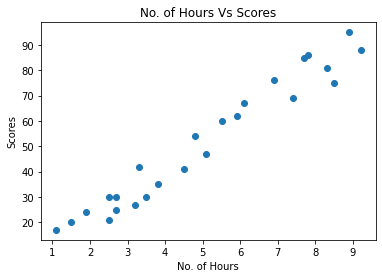

In [9]:
plt.scatter(x="Hours",y="Scores",data=data)
plt.xlabel("No. of Hours")
plt.ylabel("Scores")
plt.title("No. of Hours Vs Scores")
plt.show()

(0.0, 101.92080464224475)

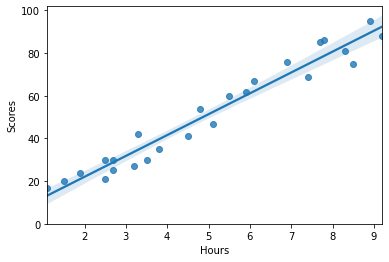

In [10]:
sn.regplot(x="Hours",y="Scores",data=data)
plt.ylim(0,)

## Correlation Heatmap

In [11]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


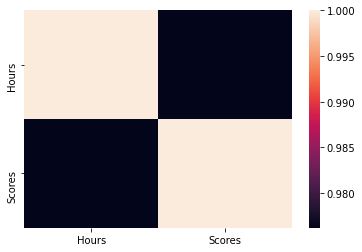

In [12]:
sn.heatmap(data.corr())

## Boxplot

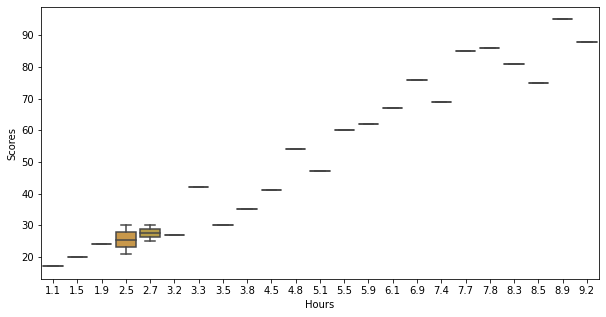

In [13]:
plt.figure(figsize=(10,5))
sn.boxplot(x="Hours",y="Scores",data=data)

## Countplots

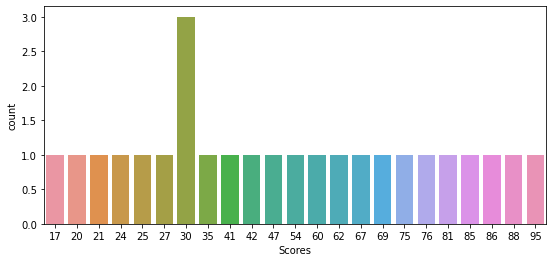

In [14]:
plt.figure(figsize=(9,4))
sn.countplot(x="Scores",data=data)

Thus 3 students have the same score as 30

## Pairplot

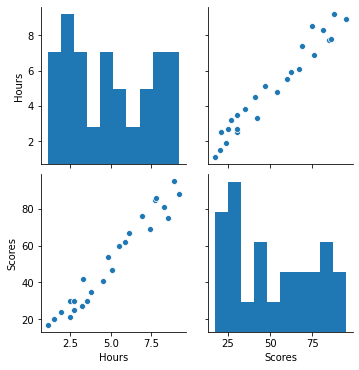

In [15]:
sn.pairplot(data)

## Jointplots

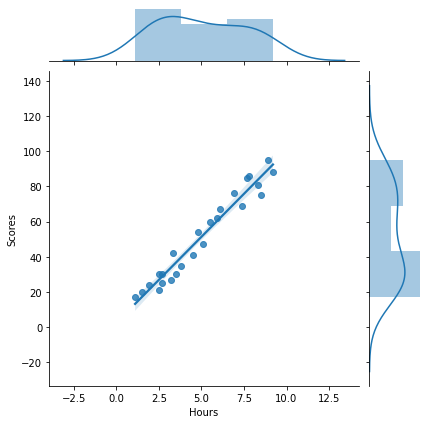

In [16]:
sn.jointplot(x="Hours",y="Scores",data=data,kind='reg')

## Distribution Plots

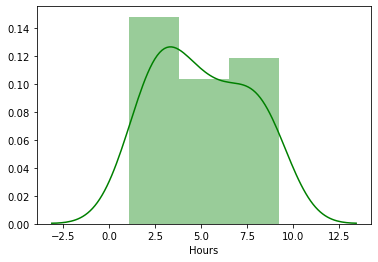

In [17]:
sn.distplot(data["Hours"],color='green')

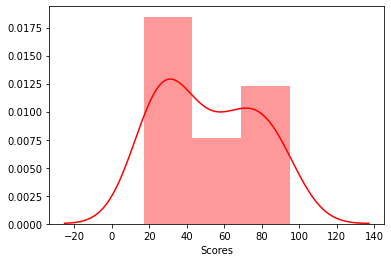

In [18]:
sn.distplot(data["Scores"],color='red')

# Linear Regression Model

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [20]:
X=sm.add_constant(data["Hours"])
Y=data["Scores"]

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.75,random_state=100)

model=sm.OLS(train_Y,train_X).fit()
model.summary2()

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.952   
Dependent Variable: Scores           AIC:                116.6082
Date:               2021-08-06 10:58 BIC:                118.3889
No. Observations:   18               Log-Likelihood:     -56.304 
Df Model:           1                F-statistic:        340.0   
Df Residuals:       16               Prob (F-statistic): 3.34e-12
R-squared:          0.955            Scale:              34.326  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      1.8709     3.1086    0.6018   0.5557   -4.7191    8.4609
Hours      9.8542     0.5344   18.4382   0.0000    8.7212   10.9872
-----------------------------------------------------------------
Omnibus:               4.767        Durbin-Watson:          2.014
Prob(Omnibus):         0.092        Jarque-Bera (JB):       1.657
Skew:                  -0.293       Prob(JB):               0.437
Kurtosis:              1.634        Condition No.:          13   
=================================================================

"""

## Thus the linear regression model is 
## Score = 1.8709 + 9.8542 * (Hours)

In [21]:
model.params

const    1.870904
Hours    9.854197
dtype: float64

In [22]:
train_Y

21    54
6     88
12    41
4     30
24    86
0     21
1     47
20    30
14    17
17    24
18    67
2     27
10    85
16    30
15    95
7     60
3     75
8     81
Name: Scores, dtype: int64

In [23]:
test_Y

9     25
22    35
13    42
11    62
5     20
19    69
23    76
Name: Scores, dtype: int64

## Predicted Values

In [24]:
pred_Y=model.predict(test_X)
print(pred_Y)

9     28.477237
22    39.316855
13    34.389756
11    60.010669
5     16.652200
19    74.791966
23    69.864867
dtype: float64


In [25]:
df=pd.DataFrame({"Actual_Value":test_Y,"Predicted_Value":pred_Y})
df

,Actual_Value,Predicted_Value
9,25,28.477237
22,35,39.316855
13,42,34.389756
11,62,60.010669
5,20,16.652200
19,69,74.791966
23,76,69.864867


### The below plot shows the deviation of predicted values from the actual values

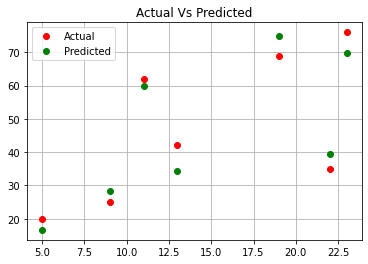

In [32]:
plt.plot(df['Actual_Value'],'ro',label='Actual')
plt.plot(df['Predicted_Value'],'go',label='Predicted')
plt.title('Actual Vs Predicted')
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Performance Metrics

In [27]:
from sklearn import metrics

rmse=np.sqrt(metrics.mean_squared_error(pred_Y,test_Y))
print("Root Mean Squared Error is",rmse)

Root Mean Squared Error is 4.9999164513728935


In [28]:
mae=metrics.mean_absolute_error(pred_Y,test_Y)
print("Mean Absolute Error is",mae)

Mean Absolute Error is 4.66693786982249


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [29]:
hours=[1,9.25]
pred_value=model.predict(hours)
print("Predicted Score corresponding to 9.25 hrs/day = {}".format(pred_value[0]))

Predicted Score corresponding to 9.25 hrs/day = 93.02223095414203
